In 1999 [paper](https://www.avaresearch.com/files/UnskilledAndUnawareOfIt.pdf) __Unskilled and Unaware of It__ two American psychologists from Cornell University suggested that unskilled people tend to overestimate their abilities. The result of their research is well-known nowadays as [the Dunning-Kruger effect](https://en.wikipedia.org/wiki/Dunning%E2%80%93Kruger_effect) in psychology. They conduct a series of experiments which are supposed to prove the hypothesis staticstcally. However, the way the researchers manipulate the data seems to be inaccurate and cause **autocorrelation**. In the following research we suggest that any random data presented in the same way can prove any hypothesis since autocorrelation does not show any valuable and significant results.

One of the experiments that the authors conduct is testing people's ability to recognize humor and their own perception of that particular skill. The authors present their findings in the form of the graph below, where the x-axis represents the quartiles they have divided the participants' answers into. Y-axis is supposed to show the percentile rating based on the extent to which the respondent's joke ratings correlated with the ratings provided by their panel of professionals (with higher correlations corresponding to better performance).

In [2]:
from IPython.display import Image

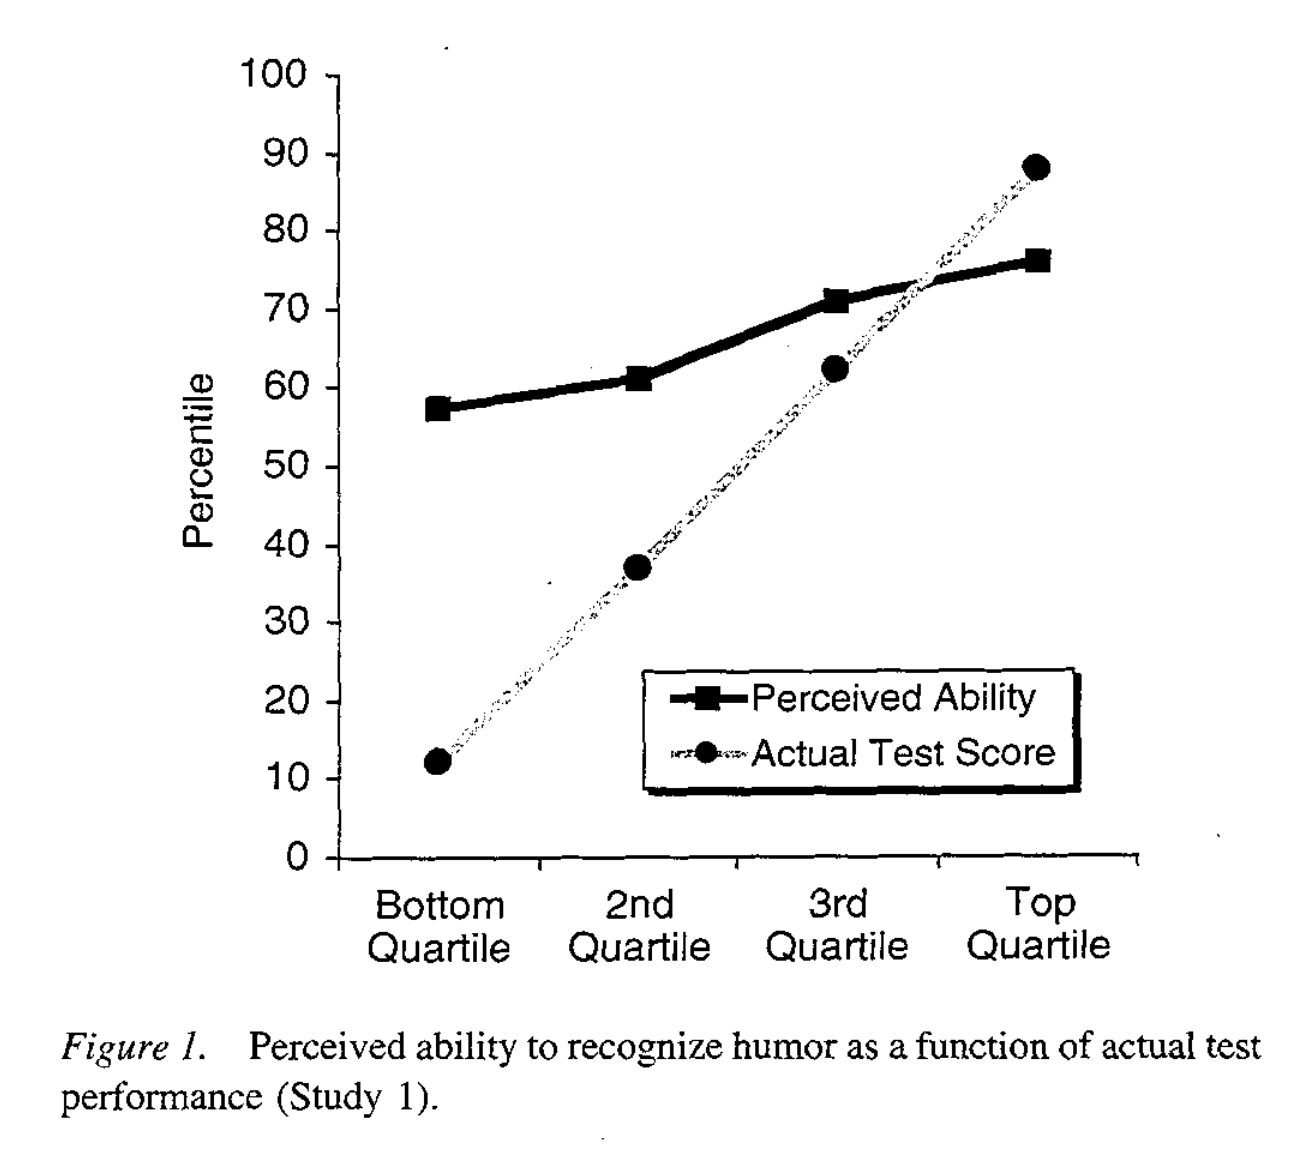

In [6]:
Image('/home/daria/Pictures/1.png', width=400)

The authors draw their attention to the bottom quartile part of the graph that is said to represent people who "grossly overestimated their ability". The reader is implicitly made to calculate the difference between the **Actual Test Score** and the **Percieved Ability** of the participants from the bottom and 2nd quartile.

Participants were 65 Cornell University undergraduates

Participants rated each joke on the same 11-point scale
used by the comedians. Afterward, participants compared their "ability to
recognize what's funny" with that of the average Cornell student by
providing a percentile ranking. In this and in all subsequent studies, we
explained that percentile rankings could range from 0 (I'm at the very
bottom) to 50 (I'm exactly average) to 99 (I'm at the very top).

### The hypothesis:
The data in the plot above represents the occurrence of __autocorrelation__. It can be replicated using random data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import pandas as pd

Generating uniformely distributed data (we do not have the data so we assume each value is equally likely to occur): 


test scores from 0 to 100, 

1000 rows for the people tested,

2 colums in each row for the actual and predicted score.


In [23]:
score = np.random.uniform(0, 100, size=(1000, 2))

In [24]:
score

array([[45.16156682, 70.41776452],
       [44.22546559, 41.44320465],
       [ 7.05473819, 79.30648616],
       ...,
       [38.75699674, 71.80819507],
       [63.96836166, 35.12974727],
       [20.29603021, 99.2587082 ]])

In [25]:
len(score)

1000

Text(0.5, 0, 'real test score')

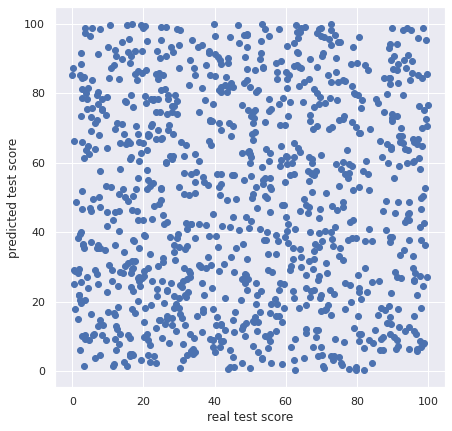

In [26]:
plt.figure(figsize=(7,7))
plt.scatter(score[:,0], score[:,1])
plt.ylabel('predicted test score')
plt.xlabel('real test score')

<BarContainer object of 1000 artists>

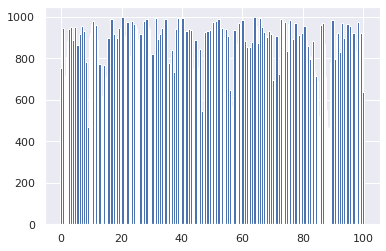

In [27]:
plt.bar(score[:,0], range(len(score)))

<BarContainer object of 1000 artists>

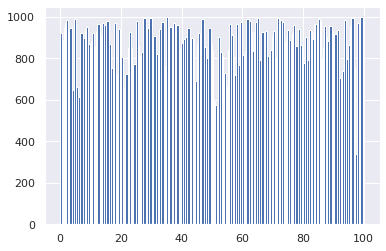

In [28]:
plt.bar(score[:,1], range(len(score)))

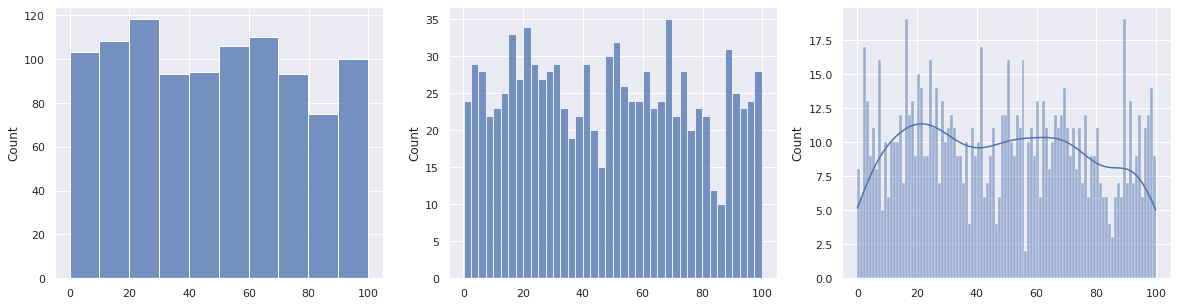

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(score[:,0], bins=10, ax=axes[0]);
sns.histplot(score[:,0], bins=40, ax=axes[1]);
sns.histplot(score[:,0], bins=100, ax=axes[2], kde=True);

All visuals confirm the data is indeed distributed uniformely.

In the next step we want to see how the difference in the predicted score correlated with the actual score.

In [30]:
real = score[:,0]
pred = score[:,1]

In [31]:
df = pd.DataFrame({
    'real' : real,
    'pred' : pred
})


In [32]:
df['diff'] = df.pred - df.real
df['sum']  = df.real + df.pred

In [33]:
df

,real,pred,diff,sum
0,45.161567,70.417765,25.256198,115.579331
1,44.225466,41.443205,-2.782261,85.668670
2,7.054738,79.306486,72.251748,86.361224
3,3.289174,61.331530,58.042357,64.620704
4,94.192498,59.818463,-34.374035,154.010960
...,...,...,...,...
995,65.743540,27.763858,-37.979683,93.507398
996,40.187669,96.313774,56.126104,136.501443
997,38.756997,71.808195,33.051198,110.565192
998,63.968362,35.129747,-28.838614,99.098109


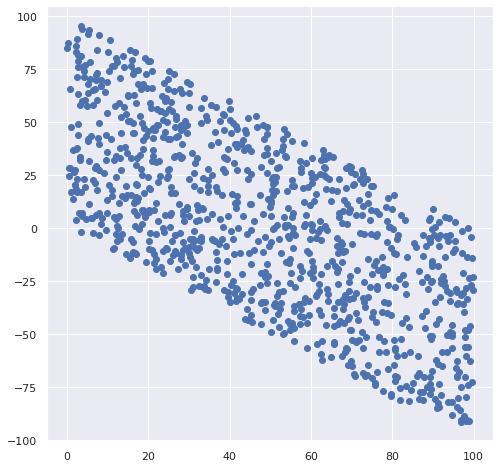

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(df['real'], df['diff'])

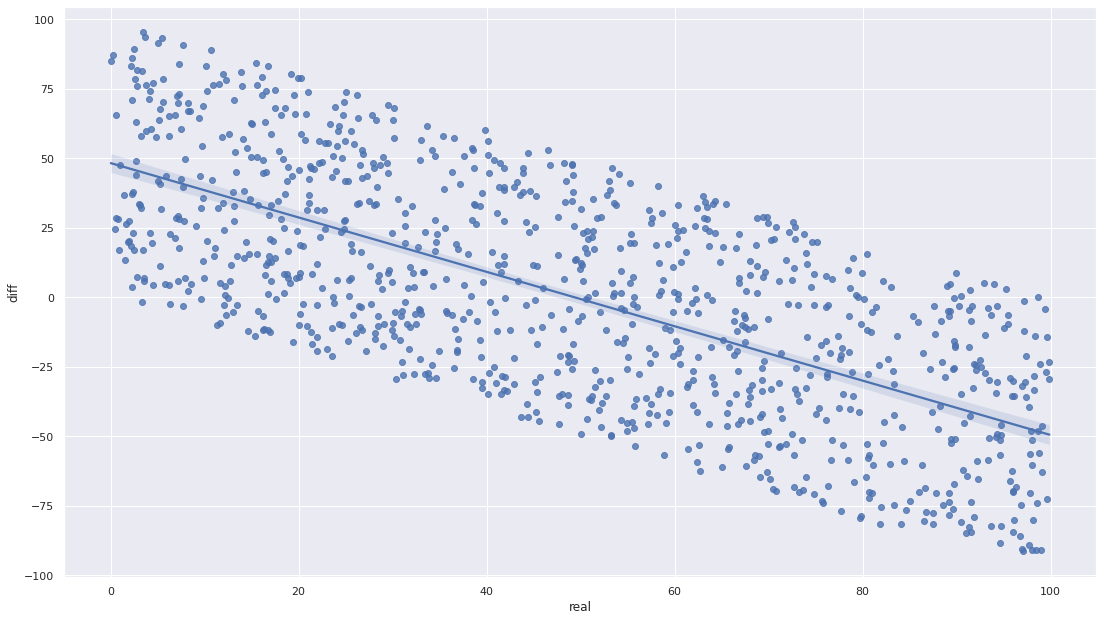

In [35]:
ax = sns.regplot(x="real", y="diff", data=df)
ax.figure.set_size_inches(18.5, 10.5)

The resulting graph suggests that people who got high real scores (>80) underestimate their ability by a lot, as the lowest difference parameter corresponds to the highest real test score. The opposite is true for people who scored the lowest. It seems that their confidence exceeds their ability.

(in reality, though, real scores correlate with themselves)

To plot the data in the same way as in the paper, we need to calculate quartiles for both real and predicted scores.

In [36]:
quart1 = df['real'].quantile(0.25)
quart2 = df['real'].quantile(0.5)
quart3 = df['real'].quantile(0.75)
quart4 = df['real'].quantile(1)

In [37]:
quart1_pred = df['pred'].quantile(0.25)
quart2_pred = df['pred'].quantile(0.5)
quart3_pred = df['pred'].quantile(0.75)
quart4_pred = df['pred'].quantile(1)

In [38]:
df['actual_quartile']=pd.qcut(df.real, q=4)

In [39]:
df

,real,pred,diff,sum,actual_quartile
0,45.161567,70.417765,25.256198,115.579331,"(23.32, 48.661]"
1,44.225466,41.443205,-2.782261,85.668670,"(23.32, 48.661]"
2,7.054738,79.306486,72.251748,86.361224,"(0.0347, 23.32]"
3,3.289174,61.331530,58.042357,64.620704,"(0.0347, 23.32]"
4,94.192498,59.818463,-34.374035,154.010960,"(71.581, 99.872]"
...,...,...,...,...,...
995,65.743540,27.763858,-37.979683,93.507398,"(48.661, 71.581]"
996,40.187669,96.313774,56.126104,136.501443,"(23.32, 48.661]"
997,38.756997,71.808195,33.051198,110.565192,"(23.32, 48.661]"
998,63.968362,35.129747,-28.838614,99.098109,"(48.661, 71.581]"


In [40]:
pred = df.groupby('actual_quartile')['pred'].mean()
real = df.groupby('actual_quartile')['real'].mean()

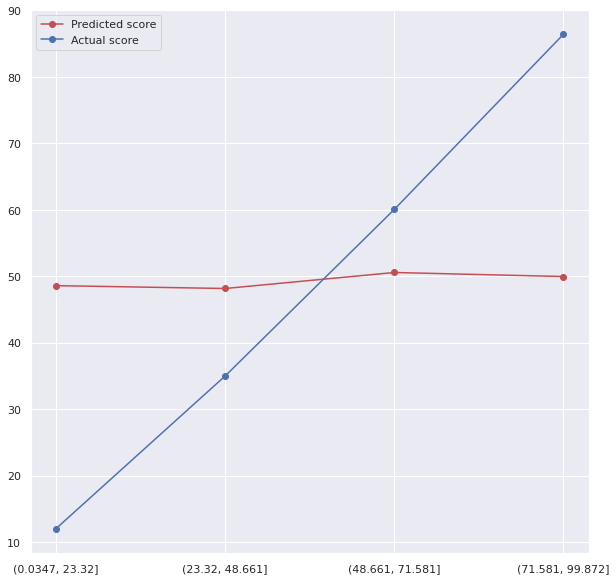

In [41]:
fig, ax =plt.subplots(figsize=(10,10))
ax.plot(pred.values, '-ro')
ax.plot(real.values, '-bo')
ax.set_xticks(range(len(pred)), pred.index)
ax.legend(["Predicted score", "Actual score"])